In [335]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [336]:
data=pd.read_csv("Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [337]:
spans=10
salary_max=max(data["salary"])
salary_min=min(data["salary"])
salaries_range=salary_max-salary_min
span_step=salaries_range/spans
salaries=[salary_min+span_step*i for i in range(spans+1)]
percentiles=[round(i/spans*100, 2) for i in range(spans+1)]
salary_spans=[str(percentiles[i])+" - "+str(percentiles[i+1])+"%" for i in range(spans)]
zeroes_SciTech=[0 for i in range(spans)]
zeroes_CommMgmt=[0 for i in range(spans)]

In [338]:
summary=pd.DataFrame(columns=["Grade", "Sci&Tech", "Comm&Mgmt"])
summary["Grade"]=salary_spans
summary["Sci&Tech"]=zeroes_SciTech
summary["Comm&Mgmt"]=zeroes_CommMgmt
summary

,Grade,Sci&Tech,Comm&Mgmt
0,0.0 - 10.0%,0,0
1,10.0 - 20.0%,0,0
2,20.0 - 30.0%,0,0
3,30.0 - 40.0%,0,0
4,40.0 - 50.0%,0,0
5,50.0 - 60.0%,0,0
6,60.0 - 70.0%,0,0
7,70.0 - 80.0%,0,0
8,80.0 - 90.0%,0,0
9,90.0 - 100.0%,0,0


In [339]:
idx_y=0
for i in range(len(data)):
    current_salary=data["salary"][i]
    current_degree=data["degree_t"][i]
    for j in range(spans):
         if(current_salary>=salaries[j]  and current_salary<=salaries[j+1]): idx_y=j-1
    if(current_degree=="Sci&Tech"): zeroes_SciTech[idx_y]+=1
    elif(current_degree=="Comm&Mgmt"): zeroes_CommMgmt[idx_y]+=1

summary["Sci&Tech"]=zeroes_SciTech
summary["Comm&Mgmt"]=zeroes_CommMgmt
summary

total=0
for i in range(spans):
    total+=(summary["Sci&Tech"][i]+summary["Comm&Mgmt"][i])
summary

,Grade,Sci&Tech,Comm&Mgmt
0,0.0 - 10.0%,14,46
1,10.0 - 20.0%,10,11
2,20.0 - 30.0%,2,2
3,30.0 - 40.0%,4,0
4,40.0 - 50.0%,0,0
5,50.0 - 60.0%,1,1
6,60.0 - 70.0%,0,0
7,70.0 - 80.0%,0,0
8,80.0 - 90.0%,0,2
9,90.0 - 100.0%,28,83


In [340]:
import matplotlib.pyplot as plt

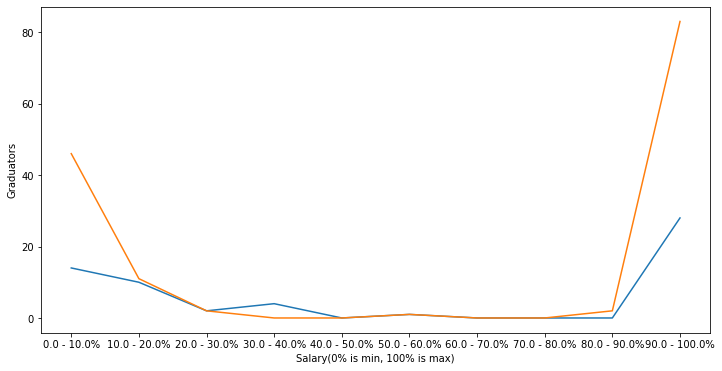

In [341]:
plt.figure(1, figsize=(12,6))

plt.xlabel("Salary(0% is min, 100% is max)")
plt.ylabel("Graduators")
plt.plot(summary["Grade"], summary["Sci&Tech"])

plt.xlabel("Salary(0% is min, 100% is max)")
plt.ylabel("Graduators")
plt.plot(summary["Grade"], summary["Comm&Mgmt"])

plt.show()

In [351]:
def GradationFrequency(data):
    volume=len(data)
    all_entries=0
    for i in range(volume):
        all_entries+=data[i]
    all_frequencies=[0 for each in range(volume)]
    for j in range(volume):
        all_frequencies[j]=round(data[j]/all_entries, 3)
    return all_frequencies

In [369]:
def VarSerAligner(serOne, serTwo):
    lenOne=len(serOne)
    lenTwo=len(serTwo)
    if lenOne==lenTwo: 
        return 1
    else:
        return 0

In [396]:
def ChiSquareTabler(freqsTabOne, freqsTabTwo): 
    if(VarSerAligner(freqsTabOne, freqsTabTwo)!=1):
        print("Series are not aligned!")
        return 0
    lenTable=len(freqsTabOne)
    chiSqTable=[0 for n in range(lenTable)]
    for i in range(lenTable):
        if freqsTabTwo[i]==0: 
            chiSqTable[i]=0
            continue
        chiSqTable[i]=(freqsTabOne[i]-freqsTabTwo[i])**2/(freqsTabTwo[i])
    return chiSqTable

In [397]:
 def ChiSquareComparer(chiSqTable, significant_level):
        chiSquareSum=0
        lenTable=len(chiSqTable)
        chiSquareTable=pd.read_excel("PearsonTheta.xlsx").iloc[lenTable-1, 1 if significant_level == 0.001 else 2]
        for i in range(lenTable):
            chiSquareSum+=chiSqTable[i]
        if(chiSquareSum>chiSquareTable): print("Statistical difference is significant")
        else: print("Statistical difference is insignificant")

In [398]:
def PearsonChiSquare(groupOne, groupTwo, significant_level):
    freqsOne=GradationFrequency(groupOne)
    freqsTwo=GradationFrequency(groupTwo)
    chiSqTable=ChiSquareTabler(freqsOne, freqsTwo)
    ChiSquareComparer(chiSqTable, significant_level)

In [399]:
PearsonChiSquare(summary["Sci&Tech"], summary["Comm&Mgmt"], 0.05)

Statistical difference is insignificant
